# Multiple Linear Regression

Multiple Linear Regression (MLR) is a statistical technique that uses several independent variables to predict the outcome of a dependent variable. The goal of MLR is to model the linear relationship between the independent variables and the dependent variable.

Mathematically, it can be represented as:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon
$$

Where:
- $Y$ is the dependent variable.
- $\beta_0$ is the y-intercept.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients of the independent variables $X_1, X_2, ..., X_n$.
- $\epsilon$ is the error term, the part of $Y$ the regression model is unable to explain.



In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the data
area = [2600, 3000, 3200, 3600, 4000]
bedrooms = [3, 4, np.nan, 3, 5]  # 'null' is represented as np.nan in Python
age = [20, 15, 18, 30, 8]
price = [550000, 565000, 610000, 595000, 760000]

# Create a DataFrame
df = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})



Data Preprocessing

In [2]:
# Handling missing (null) values by filling in with the median
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)


/var/folders/rt/tjr_sw5d05z23b3ynk_fmvtm0000gn/T/ipykernel_22149/4204309082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)


In [3]:
df.head()


,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


## Visualize

Create scatter plots of 'Area', 'Bedrooms', and 'Age' against 'Price', with a regression line fitted to each plot.

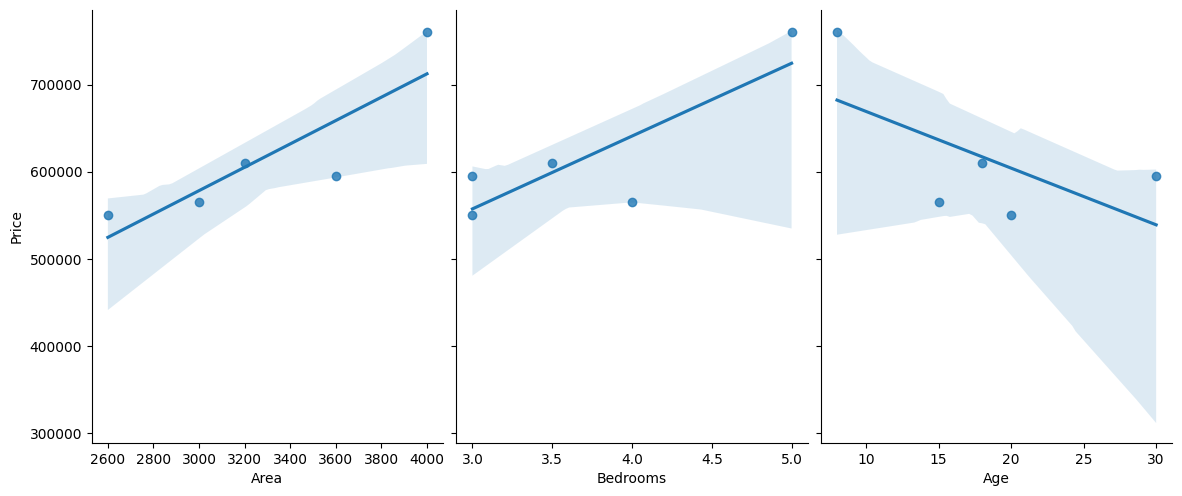

In [4]:
import seaborn as sns

# Visualizing the relationship between features and the target variable
sns.pairplot(df, x_vars=['Area', 'Bedrooms', 'Age'], y_vars='Price', height=5, aspect=0.8, kind='reg')


We'll now fit a multiple linear regression model to the data. The model will predict `Price` based on `Area`, `Bedrooms`, and `Age`.



In [5]:
# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(df[['Area', 'Bedrooms', 'Age']], df['Price'])

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_


In [6]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [    198.47159002 -116583.73881651  -14267.77585936]
Intercept: 656046.5390048665


#### Coefficients
- Each coefficient represents the change in the dependent variable (in this case, Price) for one unit of change in the corresponding independent variable, assuming all other variables are held constant.
- In your model, you have three coefficients corresponding to three independent variables: Area, Bedrooms, and Age.
- The coefficient for Area is approximately 198.47. This means for each additional square unit of area, the price of the property increases by about 198.47 units, assuming the number of bedrooms and age of the property remain constant.
- The coefficient for Bedrooms is approximately -116583.74. This indicates that for each additional bedroom, the price of the property decreases by about 116583.74 units, assuming the area and age of the property remain constant. This negative value might seem counterintuitive and could suggest multicollinearity or other issues in the data or model.
- The coefficient for Age is approximately -14267.78. This suggests that for each additional year in the age of the property, the price decreases by about 14267.78 units, assuming the area and number of bedrooms remain constant.
#### Intercept
- The intercept (approximately 656046.54) represents the expected value of the dependent variable (Price) when all independent variables are zero. In practical terms, it's the estimated starting value of Price when Area, Bedrooms, and Age are all zero.
- The interpretation of the intercept can sometimes be nonsensical in real-world scenarios, especially when a zero value for all independent variables is not realistic (e.g., a house with zero area or bedrooms).

## Prediction
We can use the fitted model to make predictions. We'll also evaluate the model using the R-squared statistic, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.


In [7]:
# Making predictions
predictions = model.predict(df[['Area', 'Bedrooms', 'Age']])

# Model Evaluation
r_squared = model.score(df[['Area', 'Bedrooms', 'Age']], df['Price'])
print("R-squared:", r_squared) 
# R-squared is commonly used as a measure to quantify how well a linear model captures the variability in the data.



R-squared: 0.9812392465259163


In [8]:
# Test data
test_data = {
    'Area': [3000, 2500, 3500, 2800],
    'Bedrooms': [3, 2, 4, 3],
    'Age': [40, 10, 5, 15]
}

# Convert test data to DataFrame
test_df = pd.DataFrame(test_data)

# Making prediction using the trained model
predicted_prices = model.predict(test_df)

# Display the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for House {i+1}: {price}")


Predicted Price for House 1: 330999.058232616
Predicted Price for House 2: 776380.2778213785
Predicted Price for House 3: 813023.2695024334
Predicted Price for House 4: 647999.136713232
